In [7]:
# Get raw 2.1.1 data
%store -r data_frame_2_1_1_preexclusions
data_frame = data_frame_2_1_1_preexclusions

In [44]:
study_test_df = data_frame.query('block_number > 0 and trial_period == trial_period')
test_df = study_test_df.query('trial_period == "test"')
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)

<ipython-input-44-deac2c45877f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
<ipython-input-44-deac2c45877f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
<ipython-input-44-deac2c45877f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [45]:
correct_test_df = test_df.query('correct == True')

In [42]:
subj_mean_rt_df = correct_test_df.groupby('uniqueid').agg({'rt': 'mean'}).reset_index()

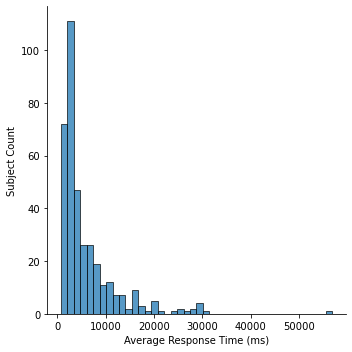

In [65]:
g = sns.displot(x='rt', data=subj_mean_rt_df)
# plt.xlabel('RT')
g.set(xlabel='Average Response Time (ms)', ylabel='Subject Count')
g.savefig('rt_distribution.pdf')

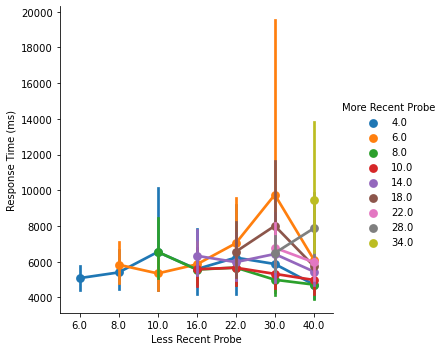

In [74]:
rt_plot = sns.catplot(x='less_recent_probe', y='rt', hue='more_recent_probe', data=rt_by_comp_type_df, kind='point')
rt_plot.set(xlabel='Less Recent Probe', ylabel='Response Time (ms)')
rt_plot._legend.set_title("More Recent Probe")
rt_plot.savefig('rt_plot.pdf')

In [53]:
subj_rt_by_comp_type_df = correct_test_df.groupby(['uniqueid', 'more_recent_probe', 'less_recent_probe']).agg({'rt': 'mean'}).reset_index()

In [55]:
subj_rt_by_comp_type_df = subj_rt_by_comp_type_df.merge(subj_mean_rt_df, on='uniqueid', suffixes=('', '_mean'))
filtered_subj_rt_by_comp_type_df = subj_rt_by_comp_type_df.query('rt_mean < 20000')

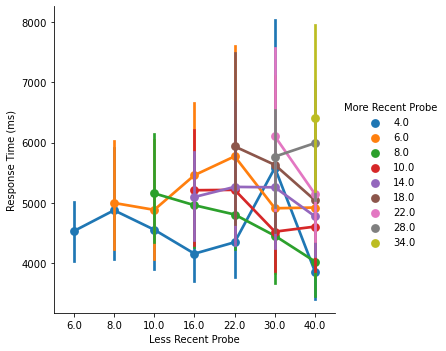

In [73]:
filtered_rt_plot = sns.catplot(x='less_recent_probe', y='rt', hue='more_recent_probe', data=filtered_subj_rt_by_comp_type_df, kind='point')
filtered_rt_plot.set(xlabel='Less Recent Probe', ylabel='Response Time (ms)')
filtered_rt_plot._legend.set_title("More Recent Probe")
filtered_rt_plot.savefig('filtered_rt_plot.pdf')

In [8]:
# Get quantity of subjects initially:
len(data_frame['uniqueid'].unique())

371

In [9]:
'''
Functions to compute accuracies:
'''

def getCorrectAnswerRTmean(df):
    
    # only correct responses
    correct_df = df[df['chosen_side'] == df['correct_side']]
    
    return correct_df['rt'].mean()

def getALLanswerRTmean(df):
    return df['rt'].mean()

In [10]:
# Get accuracies 
corr_rts = []
all_rts = []
for i in data_frame['uniqueid'].unique():

    df = data_frame[data_frame['uniqueid'] == i]
    corr_rts.append(getCorrectAnswerRTmean(df))

AttributeError: 'numpy.ndarray' object has no attribute 'set_figheight'

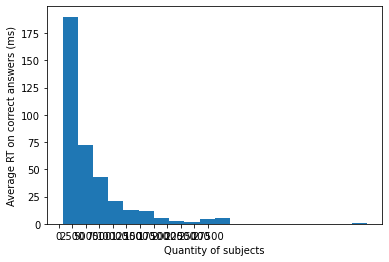

In [27]:
# plot histogram
figure= plt.hist(corr_rts, 20)
plt.xlabel("Quantity of subjects")
plt.ylabel("Average RT on correct answers (ms)")
plt.xticks(np.arange(0, 30000, 2500))
figure.set_figheight(14)
figure.set_figwidth(20)
plt.show()

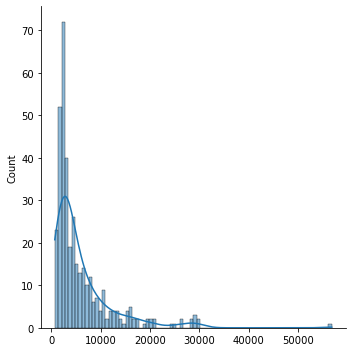

In [31]:
# reference: https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
import seaborn as sns
sns.displot(corr_rts, bins=82, kde=True)